# GloVe (Global Vectors for Word Representation)

<br>

- 카운트 기반, 예측 기반을 모두 사용하는 단어 임베딩 방법론.

## 기존 방식의 문제점

<br>

- **LSA**는 DTM(단어문서행렬), TF-IDF 행렬과 같이 **각 문서에서 단어의 빈도수를 count한 행렬**을 통해, 전체적인 통계 정보를 입력으로 받아 차원을 축소해 잠재된 의미를 끌어내는 방법론.
    - ***카운트 기반으로 말뭉치 전체의 통계 정보를 고려***하기는 함.
    - But, 왕:남자 = 여왕:? 과 같은 ***단어 의미의 유추 작업엔 성능이 많이 떨어짐.***
- **Word2Vec**은 실제값과 예측값에 대한 오차를 손실함수를 통해 줄여나가며 학습하는 예측 기반의 방법론.
    - 단어 간 유추작업은 LSA보다 뛰어나긴 함. **주변단어-중심단어를 기준삼아 단어 예측**.
    - But, **임베딩 벡터가 window 크기 내에서만 주변 단어를 고려.**
    - **말뭉치의 전체적인 통계 정보를 반영하지 못함.**
    - Word2Vec relies only on **local information** of language.

<br>

- GloVe는 이런 기존 방법론들의 한계를 지적.
- **LSA의 카운트 기반 매커니즘 + Word2Vec의 예측 기반 매커니즘** 을 모두 사용.

## Window based Co-occurence Matrix

<br>

- 동시 등장 행렬 : 행과 열을 전체 단어 집합의 단어로 구성.
    - i 단어의 윈도우 크기 내에서 k 단어가 등장한 횟수를 i행 k열에 기재.
- 예시를 보자.

Ex)  <br>
I like deep learning  <br>
I like NLP  <br>
I enjoy flying  <br>

<br>

<center>
    <table>
    <thead>
    <tr>
    <th>카운트</th>
    <th>I</th>
    <th>like</th>
    <th>enjoy</th>
    <th>deep</th>
    <th>learning</th>
    <th>NLP</th>
    <th>flying</th>
    </tr>
    </thead>
    <tbody>
    <tr>
    <td>I</td>
    <td>0</td>
    <td>2</td>
    <td>1</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    </tr>
    <tr>
    <td>like</td>
    <td>2</td>
    <td>0</td>
    <td>0</td>
    <td>1</td>
    <td>0</td>
    <td>1</td>
    <td>0</td>
    </tr>
    <tr>
    <td>enjoy</td>
    <td>1</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>1</td>
    </tr>
    <tr>
    <td>deep</td>
    <td>0</td>
    <td>1</td>
    <td>0</td>
    <td>0</td>
    <td>1</td>
    <td>0</td>
    <td>0</td>
    </tr>
    <tr>
    <td>learning</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>1</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    </tr>
    <tr>
    <td>NLP</td>
    <td>0</td>
    <td>1</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    </tr>
    <tr>
    <td>flying</td>
    <td>0</td>
    <td>0</td>
    <td>1</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    </tr>
    </tbody>
    </table>
</center>


<br>

- 대각 성분이 0인 대각행렬. Transpose해도 동일한 행렬.
    - i 단어의 윈도우 크기 내에서 k 단어가 등장한 빈도 == k 단어의 윈도우 크기 내에서 i 단어가 등장한 빈도


## Co-occurrence Probability

https://warm-uk.tistory.com/11

<br>

- 어떤 동시 등장 행렬을 가지고 동시 등장 확률을 유추할 수 있음.
- **동시 등장 확률 $P(k | i)$**? 동시 등장 행렬로부터 **특정 단어 i의 전체 등장 횟수를 카운트**, **특정 단어 i가 등장했을때 어떤 단어 k가 등장한 횟수를 카운트** 해서 **계산한 조건부 확률**.
    - i를 중심단어, k를 주변단어라고 했을 때, 
    - 동시 등장 행렬에서 중심단어 i의 행의 모든 값을 더한 값을 분모로,
    - i행 k열의 값을 분자로 한 값.

<br>

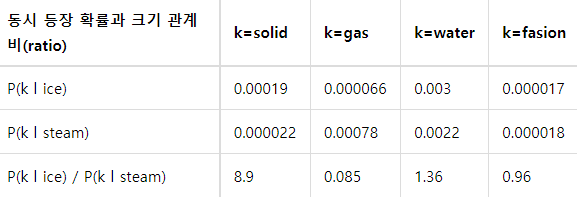
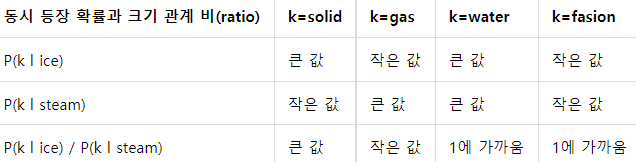

<br>

- ice가 등장했을 때 solid가 등장할 확률 0.00019
- steam이 등장했을 때 solid가 등장할 확률인 0.000022 보다 약 8.9배 큼.
    - $\frac{P(solid | ice)}{P(solid | steam)} = 8.9$
- 이를 바탕으로 손실함수를 설계할 수 있다.

## Loss Function

<br>

https://wikidocs.net/22885
https://warm-uk.tistory.com/11

<br>

*내용이 너무 김. 집을만한 내용만 여기 적자.*

<br>

- GloVe의 아이디어? **임베딩 된 중심 단어와 주변 단어 벡터의 내적이 전체 코퍼스에서 동시 등장 확률이 되도록 임베딩 벡터를 만들자.**

<br>

- 아래의 손실함수를 최소화 하는 방향으로 학습을 시키자.
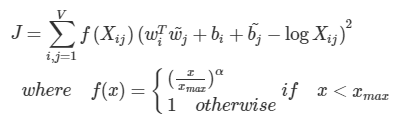



## GloVe Training

<br>

> pip install glove_python 설치 먼저. (glove_python_binary)

<br>

- II-06. 에서 썼던 데이터 쓸것. 데이터 적재, 전처리 까지 끝내두자.

<br>

- Corpus 클래스는 interable token들로부터 말뭉치를 만들어줌.
- Glove 클래스는 임베딩 벡터를 학습.

In [1]:
import urllib.request
import zipfile
from lxml import etree
import re
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
import warnings
warnings.filterwarnings(action='ignore') 

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Cheol Hee
[nltk_data]     Kim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/GaoleMeng/RNN-and-FFNN-textClassification/master/ted_en-20160408.xml",
                           filename='ted_en-20160408.xml')

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x28225e2ca90>)

In [3]:
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
targetText = etree.parse(targetXML)

In [4]:
# context block 내용만 추출,
# regex써서 괄호 배경음 부분 제거.
parseText = '\n'.join(targetText.xpath('//content/text()'))
contentText = re.sub(r'\([^)]*\)', '', parseText)

In [6]:
# 입력 corpus에 대해 NLTK를 통해 문장 토큰화 진행 (불용어 제거)
sentText = sent_tokenize(contentText)
sentText[:3]

["Here are two reasons companies fail: they only do more of the same, or they only do what's new.",
 'To me the real, real solution to quality growth is figuring out the balance between two activities: exploration and exploitation.',
 'Both are necessary, but it can be too much of a good thing.']

In [7]:
# 구두점 제거, 대문자->소문자 변환.
normalizedText = []
for text in sentText:
    tokens = re.sub(r"^a-z0-9", " ", text.lower())
    normalizedText.append(tokens)
normalizedText[:3]

["here are two reasons companies fail: they only do more of the same, or they only do what's new.",
 'to me the real, real solution to quality growth is figuring out the balance between two activities: exploration and exploitation.',
 'both are necessary, but it can be too much of a good thing.']

In [9]:
# 각 문장 토큰화 진행
result = [word_tokenize(sentence) for sentence in normalizedText]
# result[:2]

In [10]:
print('총 샘플 수 : {}'.format(len(result)))

총 샘플 수 : 273424


In [11]:
from glove import Corpus, Glove

# 훈련 데이터(result)로부터 GloVe에서 사용할 동시 등장 행렬 생성
corpus = Corpus()
corpus.fit(result, window=5)

In [12]:
# 학습에 이용할 쓰레드 갯수, 에포크 수 설정

# no_components가 임베딩 벡터 크기
# corpus.matrix를 통해 동시 등장 행렬 형태로 변환
glove = Glove(no_components=100, learning_rate=0.05)
glove.fit(corpus.matrix, epochs=20, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)

Performing 20 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19


In [13]:
glove.most_similar('man')

[('woman', 0.9590633366669388),
 ('girl', 0.8758158561717655),
 ('guy', 0.8639527641177296),
 ('boy', 0.8512950714405767)]

In [14]:
glove.most_similar('university')

[('harvard', 0.8810201161907638),
 ('mit', 0.8335694256519122),
 ('cambridge', 0.8312175111198963),
 ('center', 0.8246395510458683)]

In [15]:
glove.most_similar('stanford')

[('mit', 0.9402045330331348),
 ('moma', 0.9208473618905116),
 ('harvard', 0.9157050056643706),
 ('princeton', 0.9149013284262341)]

In [16]:
# 모델 저장
glove.save('eng_glove')

In [22]:
!python -m gensim.scripts.word2vec2tensor --input eng_glove --output eng_glove

C:\ProgramData\Anaconda3\python.exe: Error while finding module specification for 'gensim.scripts.word2vec2tensor' (ModuleNotFoundError: No module named 'gensim')
